<a href="https://colab.research.google.com/github/Rujan0833/DM_DW_LAB/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Read the dataset using the proper encoding
df = pd.read_csv('laptop_buy_data.csv', encoding='ISO-8859-1')

# Display the first few rows
print(df.head())


           Age Income Student Credit_Rating Class
0        Youth    Low     Yes     Excellent   Buy
1        Youth    Low      No     Excellent    No
2  Middle_Aged    Low      No     Excellent    No
3       Senior    Low      No          Fair    No
4  Middle_Aged    Low     Yes     Excellent    No


In [7]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Convert all columns (features + target) from text to numbers
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.head())


   Age  Income  Student  Credit_Rating  Class
0    2       1        1              0      0
1    2       1        0              0      1
2    0       1        0              0      1
3    1       1        0              1      1
4    0       1        1              0      1


In [8]:
# Assuming last column is the target
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

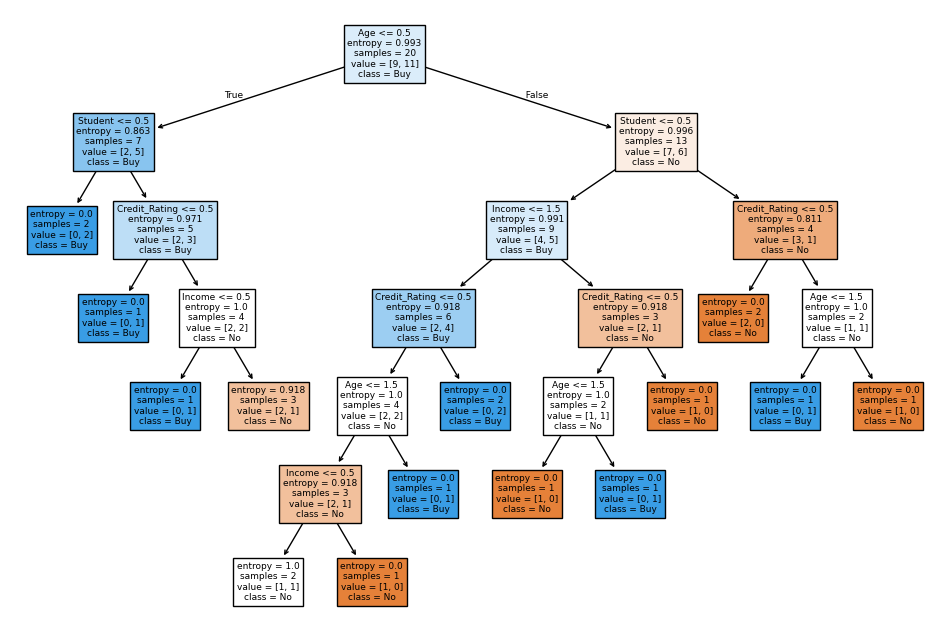

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Buy'], filled=True)
plt.show()

In [10]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X, y)

predictions = nb_model.predict(X)
print("Naive Bayes Predictions:", predictions)


Naive Bayes Predictions: [0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1]


In [11]:
import numpy as np
from sklearn.neural_network import MLPClassifier

X_custom = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_custom = np.array([-1, 1, 1, -1])
y_custom = (y_custom + 1) // 2  # convert to 0 and 1

mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=1000)
mlp.fit(X_custom, y_custom)

print("Backpropagation Predictions:", mlp.predict(X_custom))


Backpropagation Predictions: [0 1 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
